In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
df = pd.DataFrame(boston.data[:, 12]) 

In [4]:
df

,0
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [5]:
df.columns = ['LSTAT']

In [6]:
df['MEDV'] = boston.target

In [7]:
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [8]:
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

X = df[['LSTAT']].values                          # Assign matrix X
y = df['MEDV'].values                             # Assign vector y

sort_idx = X.flatten().argsort()                  # Sort X and y by ascending values of X
X = X[sort_idx]
y = y[sort_idx]

tree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

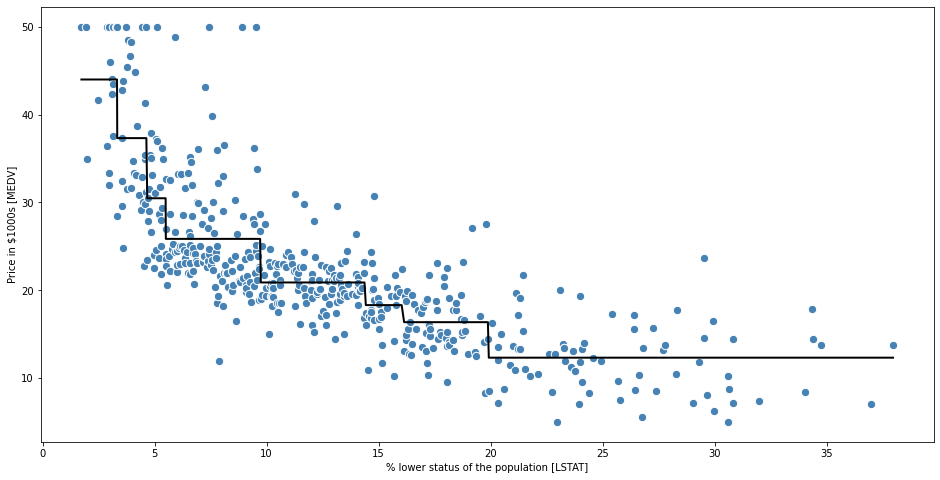

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot predicted target against features
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()